In [7]:
import pandas as pd

merged_data = pd.read_csv('merged_data.csv')
merged_data

,customer_id,customer_unique_id,order_id,product_id,seller_id,price,shipping_limit_date,review_id,review_score,order_status,...,purchase_year,purchase_month,purchase_day,category,product_name_lenght,product_description_lenght,product_photos_qty,grade,seller_grade,loyalty
0,f7c5afab273b47ab517e096e0219b932,b6c083700ca8c135ba9f0f132930d4e8,0be5691eb4c245d190a1e194494f754d,f4b952dd7ab601c02bb1bd06395f45f6,86ccac0b835037332a596a33b6949ee1,97.71,2017-09-12 15:50:35,e561b0e39d2c9f333daec23cc868ca85,4,delivered,...,2017,9,5,watches_gifts,53.0,301.0,2.0,5,Diamond,214
1,6d699e3ab0fd90fffb3d1379d937de77,0b3dc7efaafb0cf78a4796d42fa8d74c,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,0d009643171aee696f4733340bc2fdd0,fe2032dab1a61af8794248c8196565c9,356.13,2017-08-03 09:50:14,de311dfd0cf46c629921db407a7d87e9,5,delivered,...,2017,7,28,perfumery,52.0,150.0,1.0,5,Diamond,115
2,c908a3e881a6b1e45aba3336b478f445,fafbc4ecb15933633821dfd530c9263b,204c3a076103a93b98207df2faeb6b4c,c8aa3a6754ab1ad362858eca26f58c8b,4a3ca9315b744ce9f8e9374361493884,226.22,2017-05-26 09:10:28,3f8bb859f2d7024bc419b489a3fcfd56,4,delivered,...,2017,5,21,bed_bath_table,64.0,409.0,2.0,5,Diamond,115
3,964b34423c822e9bd9831635ccc83db2,e49eafd7e69d43b8d86f6b5590fafd02,0bf144db6ca7ef970a25b6a720947622,ffb2e8c1ddc7c3e590d2bc4c91de53e1,39d61be7a92eb77b7da367bd4845bc0e,68.31,2018-06-06 16:51:39,be5e8c89180b8af75c1bc86c49ade556,2,delivered,...,2018,5,29,furniture_decor,43.0,534.0,1.0,3,Silver,414
4,dd2fda0e298105194ad66353d757595b,949970123579e8829ddd1ba3d32ac18d,181728774174bd10684323a6cd0759b1,9e29dd5d33b2745d4b80ee88da614632,3d871de0142ce09b7081e2b9d1733cb1,102.64,2018-01-18 12:31:30,6d2bb124c10f13e8a5f519a098ee84c5,4,delivered,...,2018,1,11,stationery,53.0,227.0,3.0,5,Diamond,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108452,56b819ca6360d77781801ec530b47783,a6a0c8dce941954d5db099a5f472a1f9,b8bf848cf366061f0e9555337da2a9d6,06c6e01186af8b98ee1fc9e01f9471e9,fc906263ca5083d09dce42fe02247800,55.00,2017-08-30 03:06:33,82130302bbff00f6a74ffe7ab4e57781,5,delivered,...,2017,8,22,computers_accessories,53.0,144.0,2.0,4,Gold,211
108453,330a38d1e37020a112bfd9ef8e5fefcc,f72d3daaee955843ec8da1ecafacd7a2,29e4fd9b783b28e5e3d6bfa390f4ac97,657247f6f60543b93e3cc708a8e6329c,7ddcbb64b5bc1ef36ca8c151f6ec77df,323.68,2018-01-19 16:51:12,1b452e17119a6a493ebb52569100ed4c,5,delivered,...,2018,1,15,luggage_accessories,53.0,526.0,2.0,5,Diamond,315
108454,428d17477be86381ead9c16e52c0528c,3a992f49b846364998d3d24dcf6096c0,202b0e2a72ae812b73b645d02a6b1bc0,68bf2e76db1d8e846042e54da87399ca,1a3df491d1c4f1589fc2b934ada68bf2,103.75,2017-09-28 21:25:06,06d079b65e01de5990364b5773907f66,5,delivered,...,2017,9,20,bed_bath_table,55.0,743.0,2.0,5,Diamond,213
108455,47274ab84d1b20ca707a3d849699e0b4,cab23f00ab20c1f547d5fbb69659ba4d,5cdbffacc3b645aab7040623006efe52,770c257cdfc072fb50ebf2bbd6696fe1,f3da5b2ff499efb8d4a6d371d175d7dd,92.67,2018-06-18 20:15:43,b7b6cbb28e485bbb21f27f145c0b363f,5,delivered,...,2018,6,14,baby,54.0,581.0,1.0,4,Gold,513


Text(0.5, 1.0, '셀러 등급 별 매출 비중')

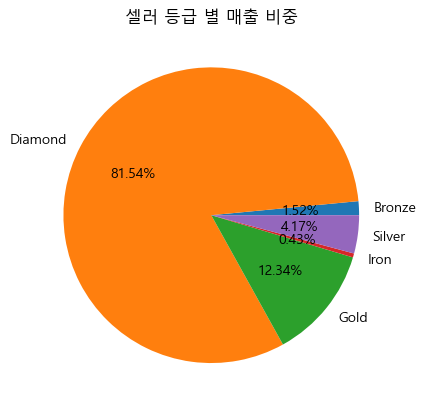

In [8]:
import matplotlib.pyplot as plt

# 셀러 등급은 5구간(20%로 나눔)
amount_by_grade = merged_data.groupby('seller_grade')['price'].sum()

# 파이차트 만들기
plt.rc('font', family = 'Malgun Gothic')
plt.pie(amount_by_grade, labels = amount_by_grade.index, autopct = '%1.2f%%')
plt.title('셀러 등급 별 매출 비중')

In [9]:
d = merged_data[merged_data['seller_grade'] == 'Diamond']
s = merged_data[merged_data['seller_grade'] == 'Silver']
print(d.groupby('seller_id')['price'].sum().min())
print(s.groupby('seller_id')['price'].sum().max())


5586.780000000001
1655.97


# ✅ 가설 1: 고성과 셀러는 상품 설명 길이가 더 길다
## 이상치 제거 안 한 버전

Diamond 셀러 평균: 914.13
Gold 셀러 평균: 876.57
Silver 셀러 평균: 869.70
Bronze 셀러 평균: 832.94
Iron 셀러 평균: 802.78

F-statistic: 3.0893
p-value: 0.0150


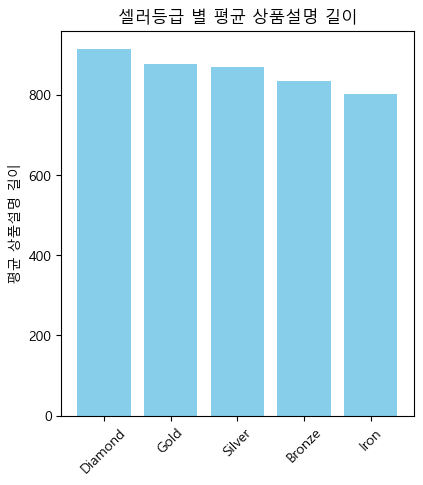

In [10]:
# 1. 중복값을 제거한 데이터 만들기
product_data = merged_data[['product_id', 'seller_id', 'seller_grade', 'product_description_lenght', 'product_photos_qty']].drop_duplicates()
product_data

# 2. 고성과 vs 저성과 셀러 구분
Diamond_perf = product_data[product_data['seller_grade'] == 'Diamond']
Gold_perf = product_data[product_data['seller_grade'] == 'Gold']
Silver_perf = product_data[product_data['seller_grade'] =='Silver']
Bronze_perf = product_data[product_data['seller_grade'] == 'Bronze']
Iron_perf = product_data[product_data['seller_grade'] == 'Iron']

# 3. 등급별 상품설명길이 평균
desc_Diamond = Diamond_perf.groupby('seller_id')['product_description_lenght'].mean()
desc_Gold = Gold_perf.groupby('seller_id')['product_description_lenght'].mean()
desc_Silver = Silver_perf.groupby('seller_id')['product_description_lenght'].mean()
desc_Bronze = Bronze_perf.groupby('seller_id')['product_description_lenght'].mean()
desc_Iron = Iron_perf.groupby('seller_id')['product_description_lenght'].mean()

# 4. 평균 비교
print(f"Diamond 셀러 평균: {desc_Diamond.mean():.2f}")
print(f"Gold 셀러 평균: {desc_Gold.mean():.2f}")
print(f"Silver 셀러 평균: {desc_Silver.mean():.2f}")
print(f"Bronze 셀러 평균: {desc_Bronze.mean():.2f}")
print(f"Iron 셀러 평균: {desc_Iron.mean():.2f}\n")

plt.figure(figsize=(10, 5))

# 5. Bar plot 시각화
plt.subplot(1, 2, 1)
plt.bar(
    ['Diamond', 'Gold', 'Silver', 'Bronze', 'Iron'],
    [
        desc_Diamond.mean(),
        desc_Gold.mean(), 
        desc_Silver.mean(), 
        desc_Bronze.mean(), 
        desc_Iron.mean()
    ], 
    color='skyblue'
)
plt.title('셀러등급 별 평균 상품설명 길이')
plt.ylabel('평균 상품설명 길이')
plt.xticks(rotation=45)

# 6. ANOAVA 검정
from scipy.stats import f_oneway

# 유의미한 차이가 있는지 통계적으로 확인.
# 각 등급의 셀러별 평균 상품 설명 길이
f_stat, p_value = f_oneway(
    desc_Diamond,
    desc_Gold,
    desc_Silver,
    desc_Bronze,
    desc_Iron,
)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

### - 통계적으로 유의미 하다

## 이상치 확인

평균:  859.22


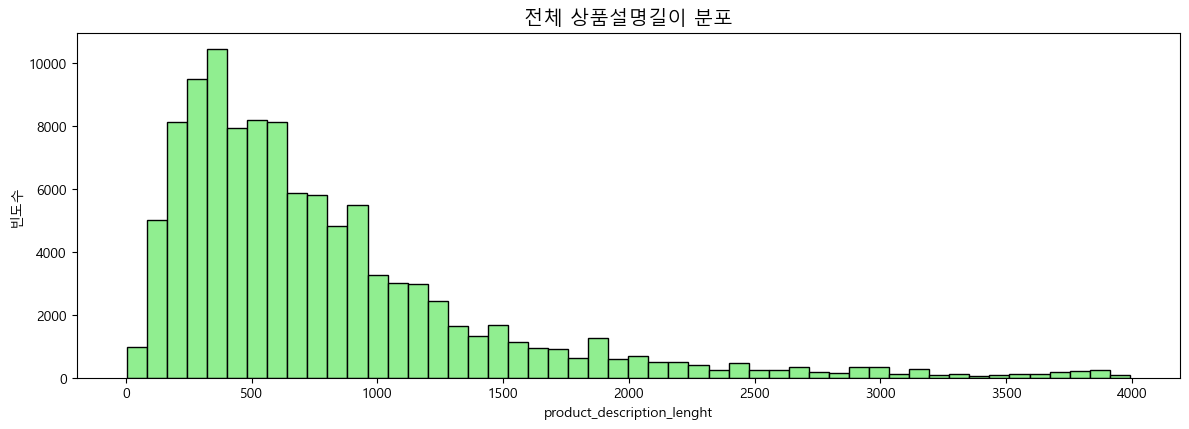

C:\Users\gfddf\AppData\Local\Temp\ipykernel_2976\416119905.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=desc_data_1, x='seller_grade', y='product_description_lenght',


Text(0.5, 0, '셀러등급')

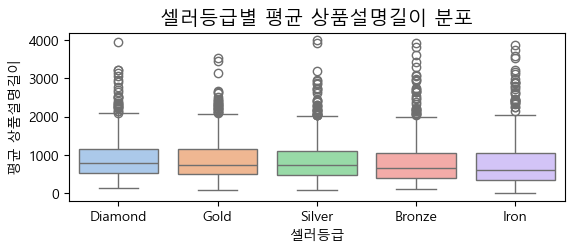

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상품 설명 길이 boxplot용 데이터 준비
desc_data_1 = product_data.groupby(['seller_id', 'seller_grade'])['product_description_lenght'].mean().reset_index()
print('평균: ', round(desc_data_1['product_description_lenght'].mean(),2))
# 시각화 시작
plt.figure(figsize=(12, 8))

# 1행 1열: 전체 상품 설명 길이 히스토그램
plt.subplot(2, 1, 1)
plt.hist(merged_data['product_description_lenght'], bins=50, color='lightgreen', edgecolor='black')
plt.title('전체 상품설명길이 분포', fontsize=14)
plt.xlabel('product_description_lenght')
plt.ylabel('빈도수')

plt.tight_layout()
plt.show()

# 2행 1열: 셀러 등급별 상품 설명 길이 분포 (Boxplot)
plt.subplot(2, 1, 2)
sns.boxplot(data=desc_data_1, x='seller_grade', y='product_description_lenght', 
            order=['Diamond', 'Gold', 'Silver', 'Bronze', 'Iron'], palette='pastel')
plt.title('셀러등급별 평균 상품설명길이 분포', fontsize=14)
plt.ylabel('평균 상품설명길이')
plt.xlabel('셀러등급')

## 이상치 제거 버전

C:\Users\gfddf\AppData\Local\Temp\ipykernel_2976\1690084231.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=desc_data_2, x='seller_grade', y='product_description_lenght',


Text(0.5, 0, '셀러등급')

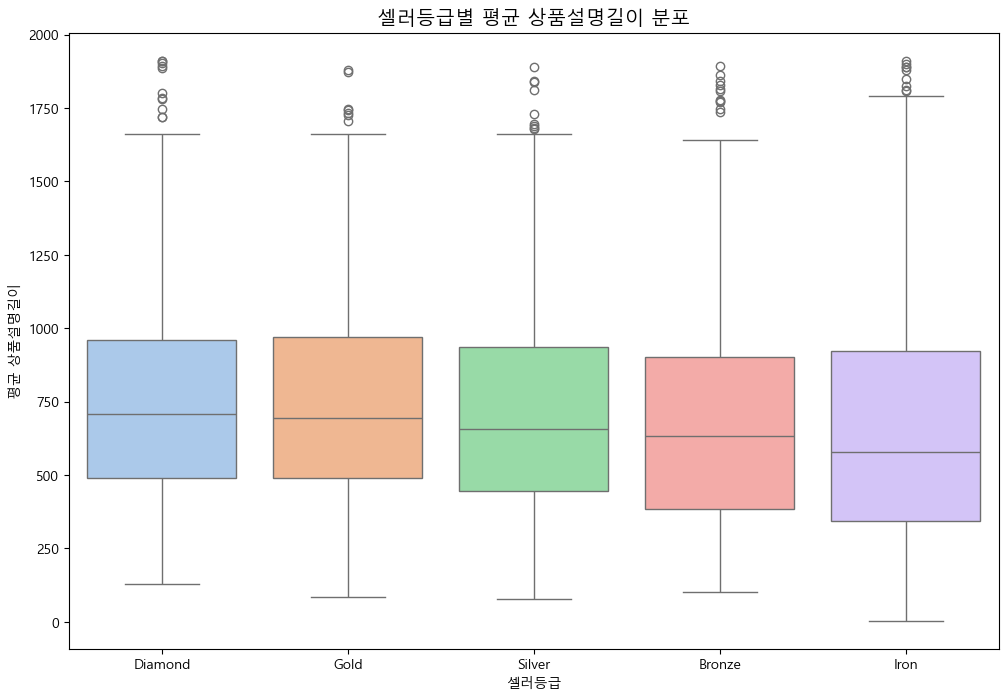

In [12]:
# 1. IQR 기반 이상치 제거
Q1 = product_data['product_description_lenght'].quantile(0.25)
Q3 = product_data['product_description_lenght'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

product_data_clean = product_data[
    (product_data['product_description_lenght'] >= lower_bound) &
    (product_data['product_description_lenght'] <= upper_bound)
]

desc_data_2 = product_data_clean.groupby(['seller_id', 'seller_grade'])['product_description_lenght'].mean().reset_index()
plt.figure(figsize=(12, 8))

sns.boxplot(data=desc_data_2, x='seller_grade', y='product_description_lenght', 
            order=['Diamond', 'Gold', 'Silver', 'Bronze', 'Iron'], palette='pastel')
plt.title('셀러등급별 평균 상품설명길이 분포', fontsize=14)
plt.ylabel('평균 상품설명길이')
plt.xlabel('셀러등급')

C:\Users\gfddf\AppData\Local\Temp\ipykernel_2976\2308346015.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=desc_data_3, x='seller_grade', y='product_description_lenght',


Text(0.5, 0, '셀러등급')

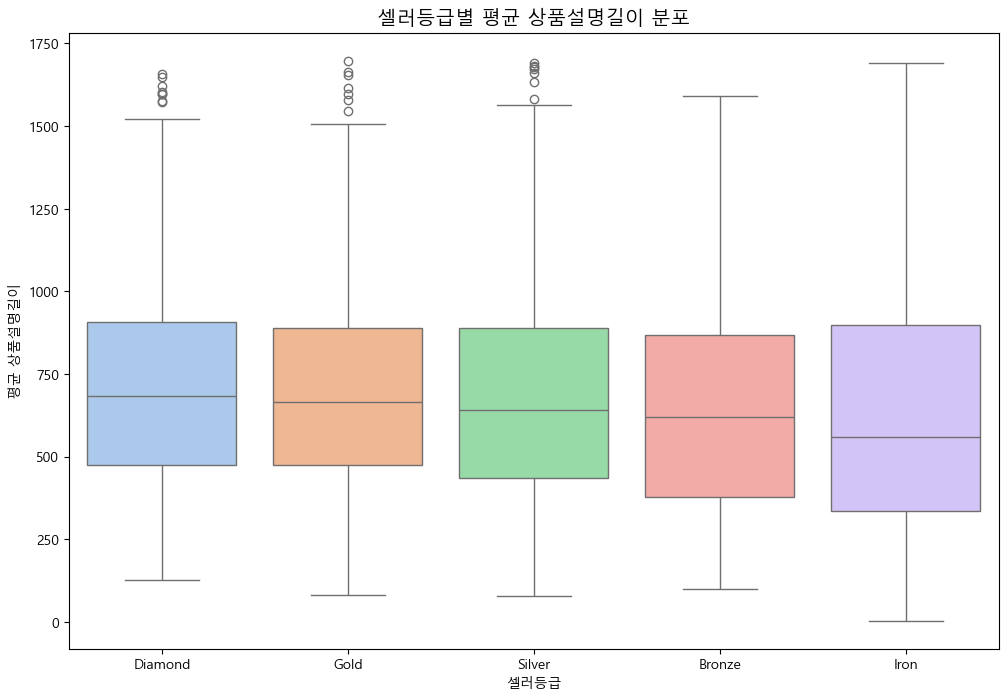

In [13]:
# 이상치 한 번 더 제거
# 1. IQR 기반 이상치 제거
Q1 = product_data_clean['product_description_lenght'].quantile(0.25)
Q3 = product_data_clean['product_description_lenght'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

product_data_clean = product_data_clean[
    (product_data_clean['product_description_lenght'] >= lower_bound) &
    (product_data_clean['product_description_lenght'] <= upper_bound)
]

desc_data_3 = product_data_clean.groupby(['seller_id', 'seller_grade'])['product_description_lenght'].mean().reset_index()
plt.figure(figsize=(12, 8))

sns.boxplot(data=desc_data_3, x='seller_grade', y='product_description_lenght', 
            order=['Diamond', 'Gold', 'Silver', 'Bronze', 'Iron'], palette='pastel')
plt.title('셀러등급별 평균 상품설명길이 분포', fontsize=14)
plt.ylabel('평균 상품설명길이')
plt.xlabel('셀러등급')

Diamond 평균: 715.46
Gold 평균: 711.31
Silver 평균: 688.50
Bronze 평균: 659.37
Iron 평균: 650.79


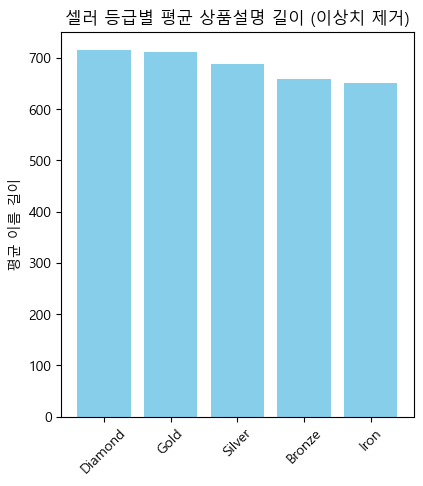

F-statistic: 4.1706
p-value: 0.0023


In [14]:
# 2. 등급별로 셀러 분리
Diamond_perf_out = product_data_clean[product_data_clean['seller_grade'] == 'Diamond']
Gold_perf_out = product_data_clean[product_data_clean['seller_grade'] == 'Gold']
Silver_perf_out = product_data_clean[product_data_clean['seller_grade'] == 'Silver']
Bronze_perf_out = product_data_clean[product_data_clean['seller_grade'] == 'Bronze']
Iron_perf_out = product_data_clean[product_data_clean['seller_grade'] == 'Iron']

# 3. 셀러별 평균 설명 길이 계산
desc_Diamond_out = Diamond_perf_out.groupby('seller_id')['product_description_lenght'].mean()
desc_Gold_out = Gold_perf_out.groupby('seller_id')['product_description_lenght'].mean()
desc_Silver_out = Silver_perf_out.groupby('seller_id')['product_description_lenght'].mean()
desc_Bronze_out = Bronze_perf_out.groupby('seller_id')['product_description_lenght'].mean()
desc_Iron_out = Iron_perf_out.groupby('seller_id')['product_description_lenght'].mean()

# 4. 평균 출력
print(f"Diamond 평균: {desc_Diamond_out.mean():.2f}")
print(f"Gold 평균: {desc_Gold_out.mean():.2f}")
print(f"Silver 평균: {desc_Silver_out.mean():.2f}")
print(f"Bronze 평균: {desc_Bronze_out.mean():.2f}")
print(f"Iron 평균: {desc_Iron_out.mean():.2f}")

# 5. 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(
    ['Diamond', 'Gold', 'Silver', 'Bronze', 'Iron'],
    [
        desc_Diamond_out.mean(),
        desc_Gold_out.mean(),
        desc_Silver_out.mean(),
        desc_Bronze_out.mean(),
        desc_Iron_out.mean()
    ],
    color='skyblue'
)
plt.title('셀러 등급별 평균 상품설명 길이 (이상치 제거)')
plt.ylabel('평균 이름 길이')
plt.xticks(rotation=45)
plt.show()

# 7. ANOVA 검정
out_f_stat, out_p_value = f_oneway(
    desc_Diamond_out,
    desc_Gold_out,
    desc_Silver_out,
    desc_Bronze_out,
    desc_Iron_out
)

print(f"F-statistic: {out_f_stat:.4f}")
print(f"p-value: {out_p_value:.4f}")

### - 통계적으로 더 강하게 유의미함.

#### 이상치 제거 후 전체 평균은 낮아졌지만, 등급 간 격차가 더 선명해졌고 통계적으로도 더 유의미해졌습니다 (p=0.0023).

#### 즉, 일부 극단적인 설명 길이들이 오히려 고성과 셀러의 평균을 흐리고 있었고, 제거하니 실제 차이가 더 뚜렷하게 드러난 것입니다.

#### 고성과 셀러일수록 설명을 더 성실하게 기재하는 경향은 이상치 제거 후에도 명확히 유지되며, 이는 단순 우연 이상의 경향임을 시사합니다.